# import libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# reading data 

In [3]:
sales = pd.read_csv('C:\\Users\\Darsh\\Downloads\\Super Market\\supermarket_sales.csv')

In [4]:
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
sales.isnull().count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [8]:
# the 'Date' datatype is an object, we need to change it to datetime
sales['date'] = pd.to_datetime(sales['Date'])
sales['date'].dtype

dtype('<M8[ns]')

In [9]:
type(sales['date'])

pandas.core.series.Series

In [10]:
sales['date'] = pd.to_datetime(sales['date'])

In [11]:
sales['day']=(sales['date']).dt.day
sales['month']=(sales['date']).dt.month
sales['year']=(sales['date']).dt.year

In [12]:
sales['day']

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: day, Length: 1000, dtype: int64

In [13]:
sales['month']

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: month, Length: 1000, dtype: int64

In [14]:
sales['year']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: year, Length: 1000, dtype: int64

In [15]:
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour

In [16]:

+

 Let's find the number of unique values in columns with object datatype
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [17]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

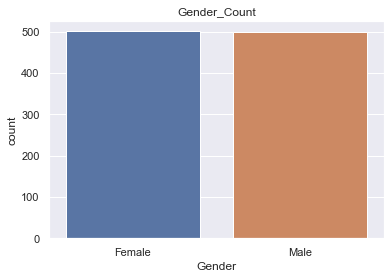

In [18]:
sns.set(style="darkgrid")
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

In [35]:
sales.groupby(['Gender']).agg({'Total': 'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


Text(0.5, 1.0, 'Rating by Branch')

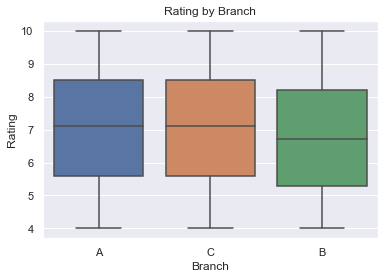

In [19]:
sns.boxplot(x='Branch',y='Rating',data=sales).set_title('Rating by Branch')

Branch B has the lowest rating among all the branches

In [20]:
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


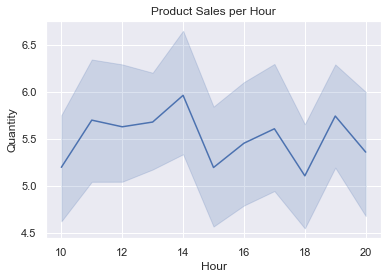

In [21]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

#Sales by the hour in the comapny Most of the item were sold around 14:00 hrs local time

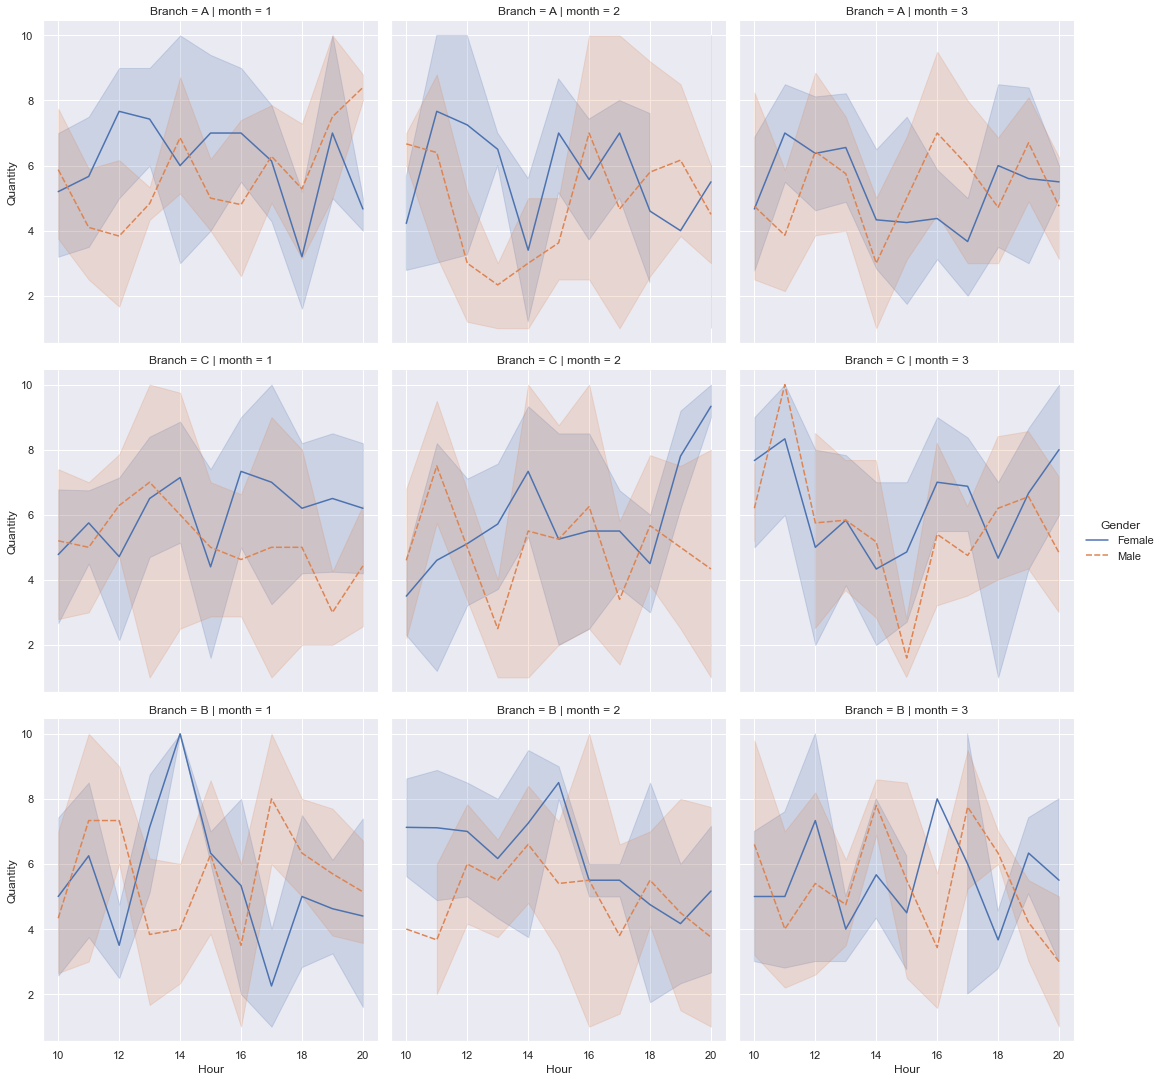

In [22]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

Below we can see each branch's sales by the hour in a monthly fashion

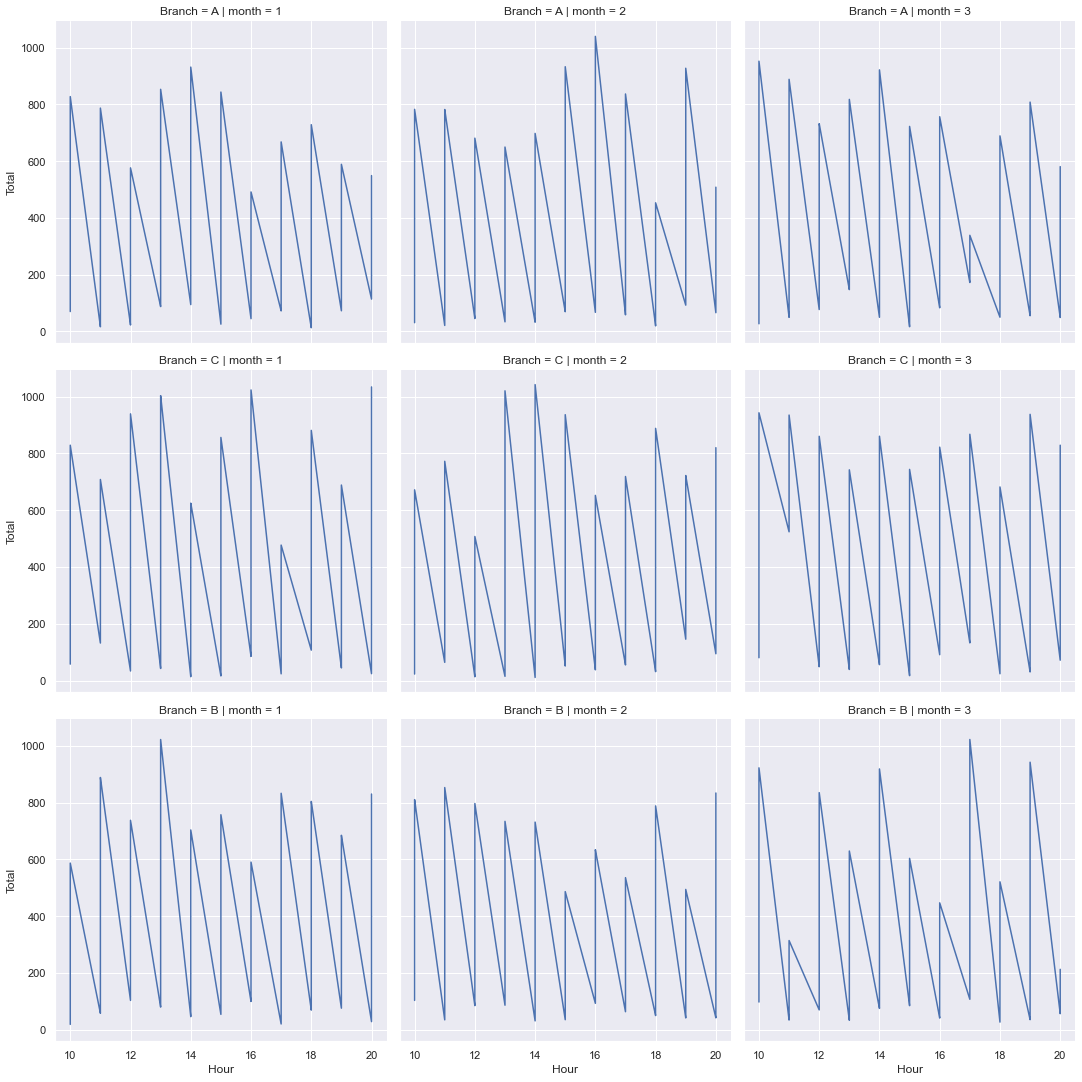

In [23]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

# Product Analysis


<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

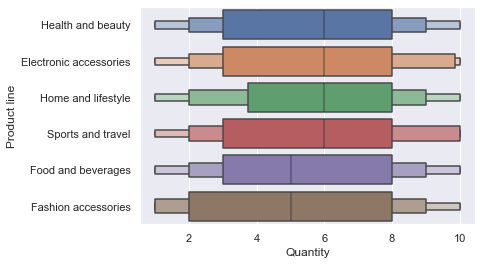

In [24]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )


From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories

<AxesSubplot:xlabel='count', ylabel='Product line'>

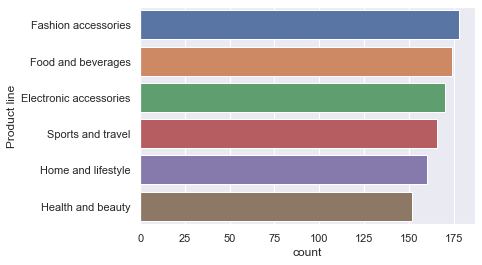

In [25]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

# payment channel

Text(0.5, 1.0, 'Payment Channel')

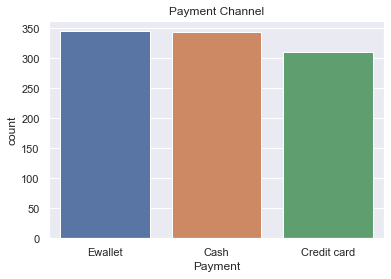

In [26]:
sns.countplot(x='Payment',data=sales).set_title("Payment Channel")


Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

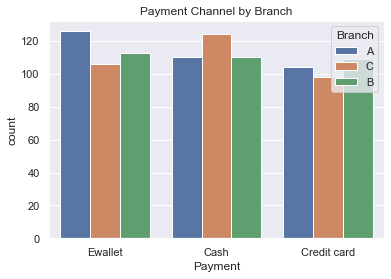

In [27]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch")
    

# Customer Analysis


Text(0.5, 1.0, 'Customer Analysis')

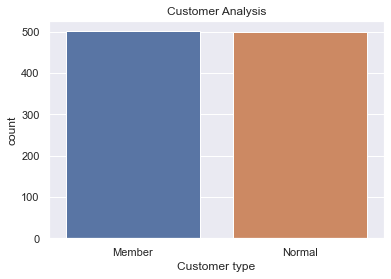

In [28]:
sns.countplot(x='Customer type',data=sales).set_title("Customer Analysis")

Text(0.5, 1.0, 'Customer type by Branch')

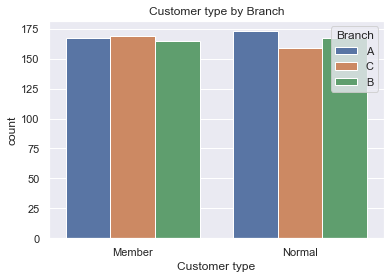

In [29]:
sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer type by Branch")

Text(0.5, 1.0, 'Rating by Branch')

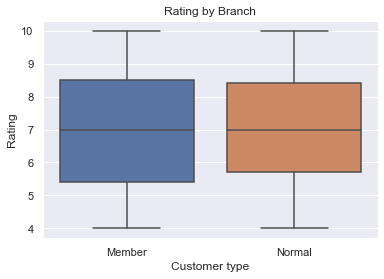

In [31]:
sns.boxplot(x='Customer type',y='Rating',data=sales).set_title('Rating by Branch')

In [33]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})


,Total
Customer type,
Member,164223.444
Normal,158743.305


In [34]:
sales.groupby(['City']).agg({'Total': 'sum'})

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705
